In [28]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print("length of X_train:", len(X_train), "\n", "length of X_test:", len(X_test))

length of X_train: 60000 
 length of X_test: 10000


In [31]:
X_train[0].shape

(28, 28)

In [32]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

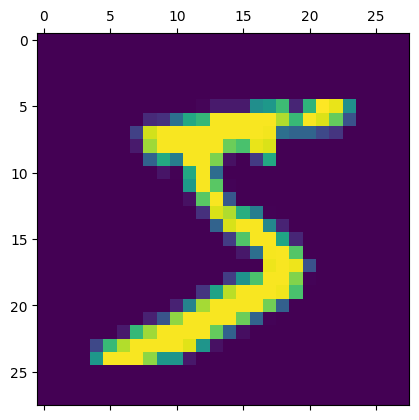

In [33]:
plt.matshow(X_train[0])

In [34]:
print(y_train[0])

5


In [35]:
#normalization
X_train = X_train / 255
X_test = X_test / 255

In [36]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [37]:
# flattening
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [38]:
# neural network

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),  
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax') 
])

2024-12-04 11:59:53.845790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-04 11:59:53.846087: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-04 11:59:53.846236: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-b9418444-ef6c-42de-a790-e105686af410): /proc/driver/nvidia/version does not exist
2024-12-04 11:59:53.846575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
from tensorflow.keras.optimizers import Adam

# model compilation
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2187 - accuracy: 0.9345
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1072 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0808 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0666 - accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0559 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0444 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0399 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0391 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [43]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
print(cm)

313/313 [==============================] - 1s 3ms/step
tf.Tensor(
[[ 971    1    1    0    1    1    2    1    1    1]
 [   0 1127    2    1    0    2    2    0    1    0]
 [   4    0 1011    5    1    0    2    4    5    0]
 [   0    0    5  994    0    3    0    3    2    3]
 [   1    2    0    0  964    0    6    0    0    9]
 [   1    0    0    8    1  875    3    0    4    0]
 [   2    2    0    1    3    2  948    0    0    0]
 [   0    1   12    0    0    0    0 1010    2    3]
 [   3    0    2    8    2    4    1    2  951    1]
 [   2    2    0    9    8    3    0    4    3  978]], shape=(10, 10), dtype=int32)


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

